# Chapter 4: Dimension Reduction

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

## Import required packages

In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt


## Descriptive Statistics


In [2]:
housing = pd.read_csv('BostonHousing.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [3]:
housing = housing.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  LSTAT     506 non-null    float64
 12  MEDV      506 non-null    float64
 13  CAT_MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


Compute mean, standard deviation, min, max, median, length, and missing values of CRIM

In [4]:
housing.CRIM.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677082
max       88.976200
Name: CRIM, dtype: float64

In [5]:
housing.CRIM.mean()

3.6135235573122535

In [6]:
housing.CRIM.isnull().sum()

0

Compute mean, standard dev., min, max, median, length, and missing values for all variables

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [8]:
housing.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT       0
MEDV        0
CAT_MEDV    0
dtype: int64

## Correlation


In [10]:
housing.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27


## Simple Table using CHAS

## Creatng Bins
Create bins of size 1 for variable using the method `pd.cut`. By default, the method creates a categorical variable, e.g. `(6,7]`. The argument `labels=False` determines integers instead, e.g. `6`.

In [13]:
housing['rm_bin']=pd.cut(housing.RM, range(0,10), labels=False)
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,rm_bin
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0,6
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0,6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1,7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1,6
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1,7
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0,6
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0,6
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0,6
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0,5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9,0,6


Compute the average of MEDV by (binned) RM and CHAS. First group the data frame using the `groupby` method, then restrict the analysis to MEDV and determine the mean for each group.

In [17]:
housing.groupby(['CHAS','rm_bin'])['MEDV'].mean()

CHAS  rm_bin
0     3         25.300000
      4         15.407143
      5         17.200000
      6         21.769170
      7         35.964444
      8         45.700000
1     5         22.218182
      6         25.918750
      7         44.066667
      8         35.950000
Name: MEDV, dtype: float64

## Melt & Pivot Tables

* Use melt to compute the above and assign it to a dataframe
* Use pivot table to compute the above and transpose CHAS 

In [18]:
pd.melt(housing, id_vars=['CHAS','rm_bin'],value_vars=['MEDV'])

,CHAS,rm_bin,variable,value
0,0,6,MEDV,24.0
1,0,6,MEDV,21.6
2,0,7,MEDV,34.7
3,0,6,MEDV,33.4
4,0,7,MEDV,36.2
...,...,...,...,...
501,0,6,MEDV,22.4
502,0,6,MEDV,20.6
503,0,6,MEDV,23.9
504,0,6,MEDV,22.0


In [19]:
mlt = pd.melt(housing, id_vars=['CHAS','rm_bin'],value_vars=['MEDV'])
pd.pivot_table(mlt, values='value', index=['rm_bin'], columns=['CHAS'], aggfunc='mean')

CHAS,0,1
rm_bin,,
3,25.300000,NaN
4,15.407143,NaN
5,17.200000,22.218182
6,21.769170,25.918750
7,35.964444,44.066667
8,45.700000,35.950000


In [ ]:
#code from Vincent
pd.pivot_table(housing, values = 'MEDV', index = ['RM_bin'], columns = ['CHAS'], aggfunc = np.mean)

## Combining Categories / Stacked bar chart
Use the method `pd.crosstab` for cross tabulation of two variables. In a second step, we convert the counts into percentages along the columns.

In [21]:
pd.crosstab(housing.CAT_MEDV, housing.ZN)

CRIM,0.00632,0.00906,0.01096,0.01301,0.01311,0.01360,0.01381,0.01432,0.01439,0.01501,0.01538,0.01709,0.01778,0.01870,0.01951,0.01965,0.02009,0.02055,0.02177,0.02187,0.02498,0.02543,0.02729,0.02731,0.02763,0.02875,0.02899,0.02985,0.03041,0.03049,0.03113,0.03150,0.03237,0.03306,0.03359,0.03427,0.03445,0.03466,0.03502,0.03510,...,13.07510,13.35980,13.52220,13.67810,13.91340,14.05070,14.23620,14.33370,14.42080,14.43830,15.02340,15.17720,15.28800,15.57570,15.86030,15.87440,16.81180,17.86670,18.08460,18.49820,18.81100,19.60910,20.08490,20.71620,22.05110,22.59710,23.64820,24.39380,24.80170,25.04610,25.94060,28.65580,37.66190,38.35180,41.52920,45.74610,51.13580,67.92080,73.53410,88.97620
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,1,1,1,0,1,0,0,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,1,0,1,1,0,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
tbl = pd.crosstab(housing.CAT_MEDV, housing.ZN)
proptbl = tbl/tbl.sum()
proptbl

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,33.0,34.0,35.0,40.0,45.0,52.5,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.91129,1.0,0.0,1.0,0.238095,1.0,0.9,1.0,1.0,1.0,0.5,0.666667,0.666667,0.428571,0.166667,1.0,0.666667,0.75,1.0,0.333333,0.666667,0.5,1.0,0.0,0.0,0.0
1,0.08871,0.0,1.0,0.0,0.761905,0.0,0.1,0.0,0.0,0.0,0.5,0.333333,0.333333,0.571429,0.833333,0.0,0.333333,0.25,0.0,0.666667,0.333333,0.5,0.0,1.0,1.0,1.0


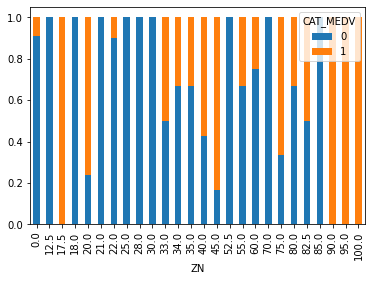

In [24]:
proptbl.transpose().plot(kind='bar', stacked=True)

## PCA using calories and rating only
Compute principal components on two dimensions

The importance of components can be assessed using the explained variance.

The `components_` field of `pcs` gives the individual components. The columns in this matrix are the principal components `PC1`, `PC2`. The rows are variables in the order they are found in the input matrix, `calories` and `rating`.

Use the `transform` method to get the scores.

In [25]:
cereals = pd.read_csv('Cereals.csv')
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


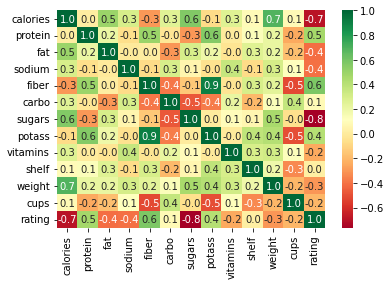

In [30]:
corr=cereals.corr()
import seaborn as sns
sns.heatmap(corr, annot=True, fmt='.1f', cmap='RdYlGn')

In [31]:
pcs = PCA(n_components=2)
pcs.fit(cereals[['calories','rating']])

PCA(n_components=2)

In [32]:
pcs.components_

array([[-0.84705348,  0.53150766],
       [ 0.53150766,  0.84705348]])

In [33]:
pcs.explained_variance_

array([498.02447768,  78.93273879])

In [34]:
pcs.explained_variance_ratio_

array([0.86319135, 0.13680865])

## PCA on all numerical variables
Perform a principal component analysis of the whole table ignoring the first three non-numerical columns.

In [36]:
cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [37]:
pcs = PCA()

In [38]:
pcs.fit(cereals.iloc[:,3:].dropna(axis=0))

PCA()

In [39]:
pcs.explained_variance_ratio_

array([5.39502578e-01, 3.86674049e-01, 3.94252505e-02, 2.82906051e-02,
       5.45550568e-03, 3.36406466e-04, 2.22065532e-04, 4.67369240e-05,
       3.32742825e-05, 1.05508115e-05, 2.67276286e-06, 3.05401440e-07,
       2.18743520e-19])

In [47]:
pcsSummary = pd.DataFrame({'std_dev':np.sqrt(pcs.explained_variance_),
                           'prop_variance':pcs.explained_variance_ratio_,
                           'cum_prop_var':np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary.head()
pcsSummary_tps = pcsSummary.transpose()
pcsSummary_tps.columns = ['PC{}'.format(i) for i in range(1,len(pcsSummary_tps.columns)+1)]

In [48]:
pcsSummary_tps.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
std_dev,83.764075,70.914255,22.643745,19.181482,8.423228,2.091670,1.699423,0.779635,0.657833,0.370428,0.186441,6.302264e-02,5.333701e-08
prop_variance,0.539503,0.386674,0.039425,0.028291,0.005456,0.000336,0.000222,0.000047,0.000033,0.000011,0.000003,3.054014e-07,2.187435e-19
cum_prop_var,0.539503,0.926177,0.965602,0.993892,0.999348,0.999684,0.999906,0.999953,0.999986,0.999997,1.000000,1.000000e+00,1.000000e+00


Text(0.5, 0, 'Dimensions')

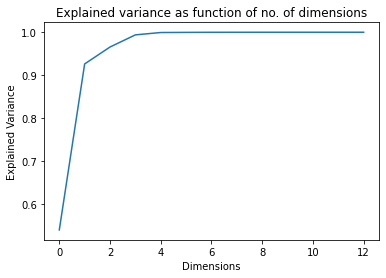

In [49]:
#from Vincent
cumsum = np.cumsum(pcs.explained_variance_ratio_)
plt.plot(cumsum)
plt.title('Explained variance as function of no. of dimensions')
plt.ylabel('Explained Variance')
plt.xlabel('Dimensions')

## Normalizing data prior to PCA
We kept the Tableau graphic in the book, however these code snippets demonstrate how a similar graph could be generated using Python

Use the preprocessing functionality in scikit-learn to standardize the data before the PCA

In [50]:
norm_cereals = pd.DataFrame(preprocessing.scale(cereals.iloc[:,3:].dropna(axis=0)))
norm_cereals.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.878652,1.391180,0.0,-0.393692,3.250706,-2.517206,-0.255940,2.578001,-0.183083,0.948401,-0.202203,-2.099895,1.867565
1,0.658214,0.455295,4.0,-1.792572,-0.072986,-1.741067,0.206001,0.518288,-1.312098,0.948401,-0.202203,0.761919,-0.601791
2,-1.878652,1.391180,0.0,1.187651,2.835245,-1.999780,-0.486911,3.146198,-0.183083,0.948401,-0.202203,-2.099895,1.223491
3,-2.893399,1.391180,-1.0,-0.272050,4.912553,-1.741067,-1.641763,3.288247,-0.183083,0.948401,-0.202203,-1.373763,3.682812
4,0.150841,-0.480589,1.0,0.214517,-0.280717,-1.094285,0.667942,-0.405032,-0.183083,-1.471657,-0.202203,-0.305922,-0.922781


In [55]:
pcs=PCA()
pcs.fit(norm_cereals)
pcsSummary_df = pd.DataFrame({'std_dev':np.sqrt(pcs.explained_variance_),
                               'prop_var':pcs.explained_variance_ratio_,
                               'cum_prop':np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns=['PC{}'.format(i) for i in range(1,len(pcsSummary_df.columns)+1)]
pcsSummary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
std_dev,1.919214,1.786387,1.391224,1.016583,1.001455,0.855543,0.825055,0.649557,0.565756,0.305076,0.253660,0.139914,1.509642e-08
prop_var,0.279508,0.242158,0.146873,0.078421,0.076105,0.055543,0.051655,0.032017,0.024289,0.007063,0.004883,0.001485,1.729402e-17
cum_prop,0.279508,0.521666,0.668539,0.746960,0.823065,0.878608,0.930263,0.962281,0.986569,0.993632,0.998515,1.000000,1.000000e+00


In [60]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
                                index=cereals.iloc[:,3:].columns)
pcsComponents_df.iloc[:,:8]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
calories,-0.299542,-0.393148,0.114857,-0.204359,0.203899,0.255906,0.025595,-0.002477
protein,0.307356,-0.165323,0.277282,-0.300743,0.319749,-0.120752,-0.282705,-0.426632
fat,-0.039915,-0.345724,-0.204890,-0.186833,0.586893,-0.347967,0.051155,0.063050
sodium,-0.183397,-0.137221,0.389431,-0.120337,-0.338364,-0.664372,0.283703,0.176720
fiber,0.453490,-0.179812,0.069766,-0.039174,-0.255119,-0.064244,-0.112325,0.216216
carbo,-0.192449,0.149448,0.562452,-0.087835,0.182743,0.326393,0.260468,0.167436
sugars,-0.228068,-0.351434,-0.355405,0.022707,-0.314872,0.152082,-0.227985,-0.063088
potass,0.401964,-0.300544,0.067620,-0.090878,-0.148360,-0.025154,-0.148808,0.262222
vitamins,-0.115980,-0.172909,0.387859,0.604111,-0.049287,-0.129486,-0.294276,-0.457041
shelf,0.171263,-0.265050,-0.001531,0.638879,0.329101,0.052044,0.174834,0.414146


## PCA on Wine Data

In [61]:
wine = pd.read_csv('Wine.csv')
wine.head()

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [62]:
pcs = PCA()
pcs.fit(preprocessing.scale(wine.iloc[:,1:].dropna(axis=0)))
pcs.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [65]:
pcsSummary_df = pd.DataFrame({'std_dev':np.sqrt(pcs.explained_variance_),
                               'prop_var':pcs.explained_variance_ratio_,
                               'cum_prop':np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns=['PC{}'.format(i) for i in range(1,len(pcsSummary_df.columns)+1)]
pcsSummary_df.iloc[:,:8]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
std_dev,2.175417,1.584639,1.205920,0.961335,0.926309,0.803295,0.744407,0.592002
prop_var,0.361988,0.192075,0.111236,0.070690,0.065633,0.049358,0.042387,0.026807
cum_prop,0.361988,0.554063,0.665300,0.735990,0.801623,0.850981,0.893368,0.920175
